# Pr√©sentation de notre projet

Le but de ce TP est d‚Äôimpl√©menter un programme python capable d‚Äôinterpr√©ter une cha√Æne de Markov ou un processus de d√©cision markovien donn√© par l‚Äôutilisateur pour v√©rifier sa correction, la simuler et l‚Äôafficher graphiquement mais aussi lui appliquer quelques m√©thodes usuelles de model checking et d'apprentissage par renforcement.

In [1]:
from mdp import *

# Mod√©lisation

## Structure de Donn√©e
Afin de repr√©senter une cha√Æne de markov ou un processus de d√©cision Markovien, nous d√©finissons une classe d‚Äôobjet MDP.
Celle-ci contient une liste d‚Äô√©tats repr√©sent√©s par leurs labels, une liste des actions qu‚Äôil est possible de r√©aliser, ainsi qu‚Äôun dictionnaire ayant pour cl√© les actions et pour valeurs des matrices dans laquelle chaque entr√©e correspond √† un √©tat et √† l‚Äô√©tat suivant avec le poids de cette transition. A noter qu‚Äôune bonne partie de ces poids peuvent √™tre √©gaux √† 0 s‚Äôil n‚Äôexiste pas de transition menant d‚Äôun certain √©tat √† un autre pour une action consid√©r√©e.
On ajoute l‚Äôattribut possible_actions qui indique pour chaque √©tat quelles sont les diff√©rentes actions possibles. On repr√©sente le cas sans action comme une action None.

Pour le test et la repr√©sentation graphique on rajoute finalement l‚Äôattribut accessible qui permettra d‚Äôidentifier les √©tats inaccessibles depuis l‚Äô√©tat initial, ainsi que graph et blue_state.

La m√©thode summary affiche sur la console un r√©sum√© des attributs de l‚Äôobjet.
## Parsing
La r√©alisation du Parsing s‚Äôappuie pour la partie grammaire sur un programme fourni par l‚Äô√©quipe p√©dagogique et qu‚Äôil nous suffit d‚Äôinterpr√©ter.

Pour pouvoir associer notre classe MDP d√©finie plus haut √† l‚Äôobjet  gramPrintListener fourni on ajoute √† ce dernier un attribut mdp de la classe MDP que l‚Äôo va modifier au fur et √† mesure de la lecture du fichier.

On proc√®de pour cela en 3 √©tapes:
La premi√®re est de d√©terminer l‚Äôensemble des √©tats et de les ins√©rer dans mdp.states.
On fait ensuite de m√™me avec actions.
Puis pour chaque transition, qu‚Äôelle soit avec ou sans action, on r√©cup√®re l‚Äô√©tat de d√©part et les diff√©rents √©tats d‚Äôarriv√©e avec leurs poids. On peut alors compl√©ter la matrice de transition (quitte √† l'ajouter si besoin) dans mdp.transition. En outre, on ajoute l‚Äôaction ou None dans les actions possibles depuis l‚Äô√©tat de d√©part de la transition.
## Cas de mdp incomplets
Les fichiers entr√©s par l‚Äôutilisateur peuvent parfois √™tre incomplets, comment notre programme g√®re les diff√©rents cas:
Si aucun √©tat n‚Äôest d√©fini: Le programme s'interrompt sur une erreur.
Si une transition a seulement des poids nuls: celle-ci n‚Äôest pas prise en compte.
Si un √©tat non d√©fini apparait dans les transitions: On ajoute ce nouvel √©tat
Si une action non d√©finie appara√Æt dans les transitions: on ajoute cette nouvelle action.
## Testing
Le test vise √† rep√©rer des probl√®mes qui n‚Äôont pas √©t√© rep√©r√©s durant le parsing, c‚Äôest √† dire les situations suivantes:
Si les dimensions d‚Äôune matrice de transition ne correspondent pas au nombre d‚Äô√©tats ( ce qui peut √™tre d√ª √† l'ajout d‚Äôun √©tat au cours du parsing): On compl√®te les matrices avec des 0.
Si un √©tat n‚Äôa aucune transition: une transition vers lui m√™me est ajout√©e
Si un √©tat a √† la fois des transitions avec et sans action: Dans le cas d‚Äôune simulation automatique le cas sas action sera toujours privil√©gi√©
Si un √©tat est inaccessible: Cela est signal√© √† l‚Äôutiisateur.
## Affichage Graphique
Pour l‚Äôaffichage graphique, on utilise pydot afin de cr√©er un graphe repr√©sentant la cha√Æne de Markov.
Chaque √©tat est reli√© √† un n≈ìud. Les actions possibles depuis un n≈ìud correspondent √©galement √† des n≈ìuds r√©duits √† un simple point. Les transitions et choix d‚Äôactions sont repr√©sent√©s par des ar√™tes dont le label est soit l‚Äôaction pour les ar√™tes menant d‚Äôun √©tat √† un point action, soit les poids pour les transitions.
On introduit √©galement une m√©thode update qui prend en entr√©e l‚Äô√©tat actuel et le colore en bleu. Cette m√©thode ne sera utilis√©e qu‚Äô√† la demande de l‚Äôutilisateur.

## Simulation
Pour la simulation nous avons choisis d‚Äôimpl√©menter deux modes :
Automatique
Manuel
Le mode manuel n‚Äôest utilis√© que pour les processus de d√©cisions markoviens (MDP) car ceux-ci requiert de faire un choix sur les actions possible depuis un sommet.
### Mode Automatique
Le mode automatique est assez simple, il choisit l‚Äôaction sortante du sommet al√©atoirement avec la fonction choice de la librairie random.

### Mode Manuel
Le mode manuel affiche simplement les actions possibles dans le sommet actuel et demande √† l‚Äôutilisateur d'en choisir une.

Une fois l‚Äôaction choisie (par le mode automatique ou par l‚Äôutilisateur), il suffit de choisir quelle transitions effectuer en fonction de leurs probabilit√©s respectives.
Pour cela on utilise la fonction choices de la librairie random qui elle prend en compte les poids de chaque ar√™tes dans le choix de la transition.

Maintenant il suffit simplement d‚Äôit√©rer afin d‚Äôavoir une simulation compl√®te.
### Conditions d'arr√™t :
Il y a deux conditions pour que la simulation s‚Äôarr√™te :
On atteint le nombre maximum d‚Äôit√©rations choisies en param√®tre de la fonction.
On atteint un sommet ‚Äúfinal‚Äù, qui boucle sur lui-m√™me avec une probabilit√© de 1.

## Exemple de mod√©lisation de Cha√Æne de Markov

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['I', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Actions defined by the user : ['a']
Transition from I with no action and targets ['T1', 'T2'] with weights [1, 1]
Transition from T1 with no action and targets ['T3', 'T4'] with weights [1, 1]
Transition from T2 with no action and targets ['T5', 'T6'] with weights [1, 1]
Transition from T3 with no action and targets ['S1', 'T1'] with weights [1, 1]
Transition from T4 with no action and targets ['S2', 'S3'] with weights [1, 1]
Transition from T5 with no action and targets ['S4', 'S5'] with weights [1, 1]
Transition from T6 with no action and targets ['S6', 'T2'] with weights [1, 1]
Transition from S1 with no action and targets ['S1'] with weights [1]
Transition from S2 with no action and targets ['S2'] with weights [1]
Tr

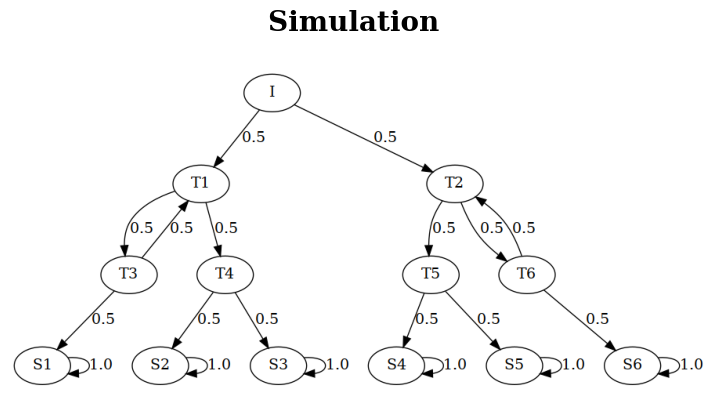

Simulation automatique ? Y/N 
Y
Animation graphique? Y/N 
Y

Starting Simulation
--------------------
Max transitions : 100
--------------------
Starting states : I


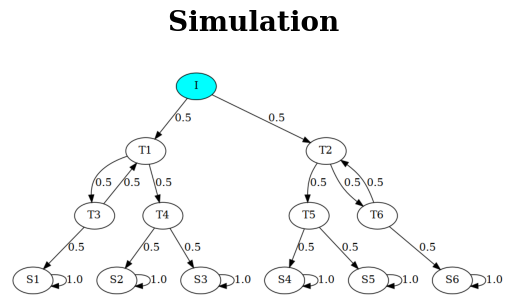

0: Transition from I to T2


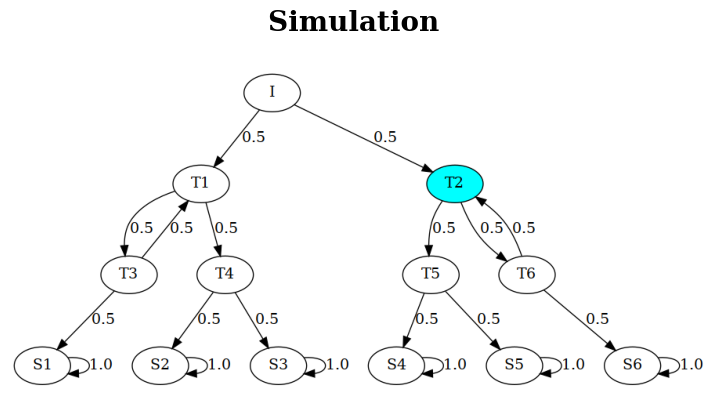

1: Transition from T2 to T5


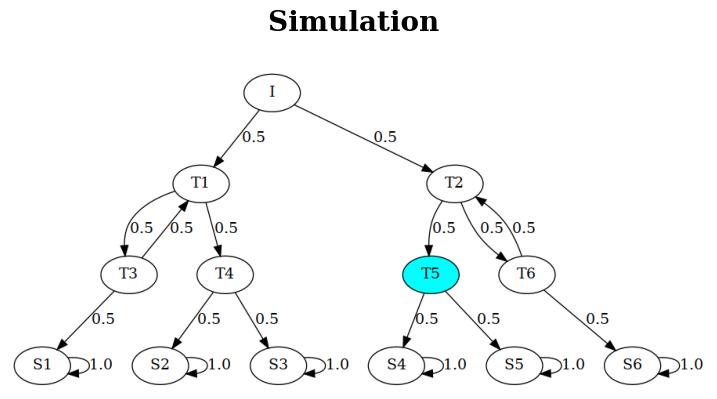

2: Transition from T5 to S5


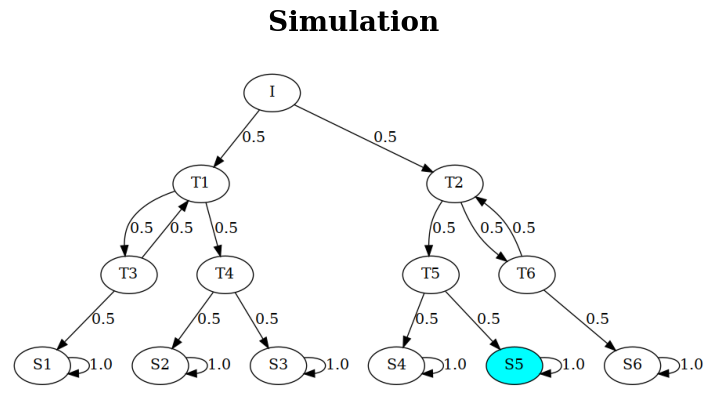

This state loop on himself, ending simulation.


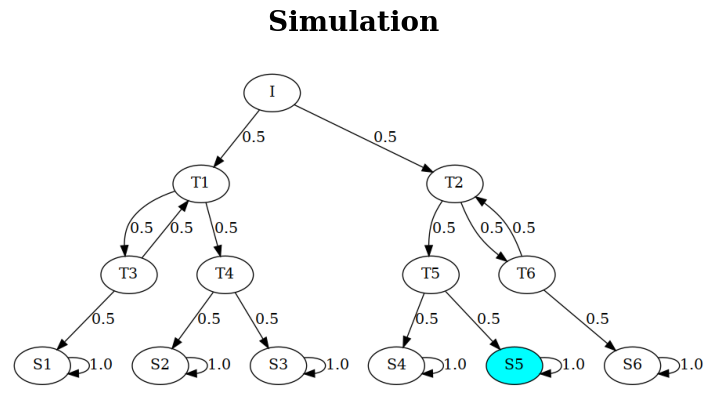

In [2]:
mdp = open("simu-mc.mdp")
mdp.print()
mdp.simulate(max_steps = 100)

## Exemple de Mod√©lisation de Processus de D√©cision Markovien

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

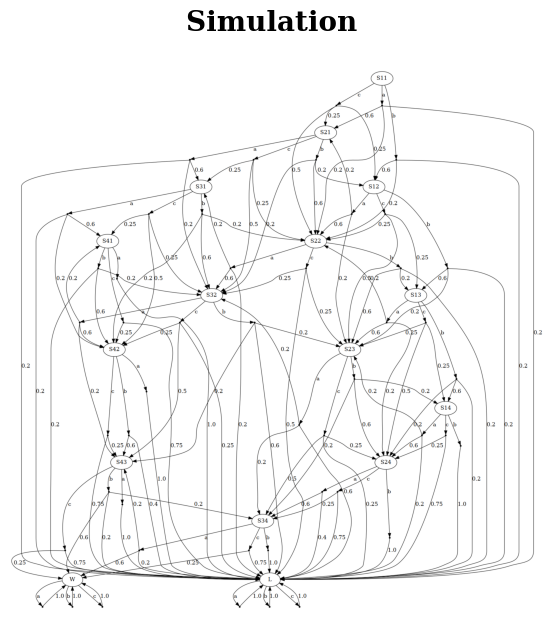

Simulation automatique ? Y/N 
Y
Animation graphique? Y/N 
Y

Starting Simulation
--------------------
Max transitions : 100
--------------------
Starting states : S11


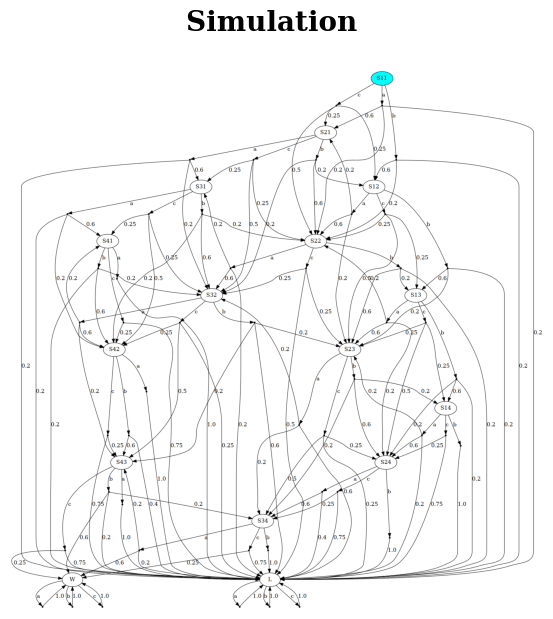

0: Transition from S11 to S22 using action c


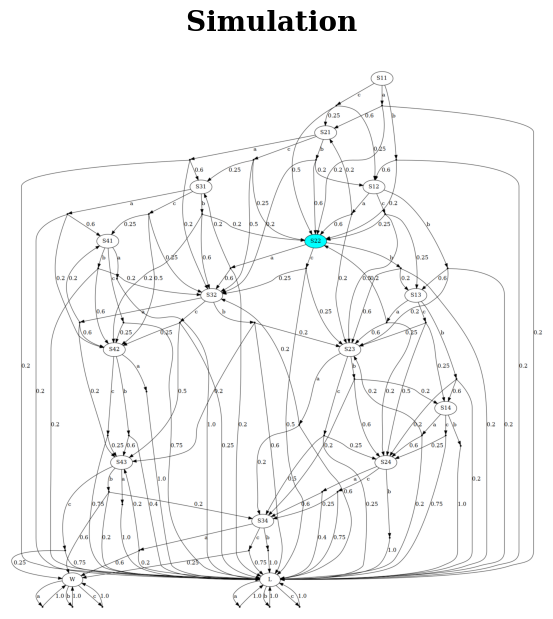

1: Transition from S22 to S23 using action c


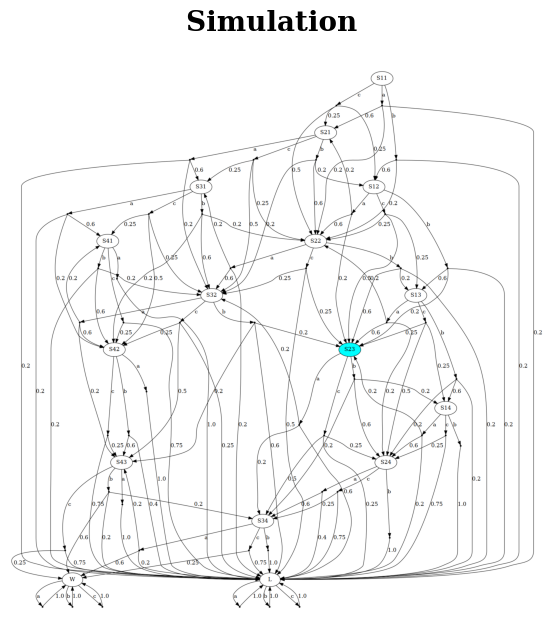

2: Transition from S23 to S34 using action b


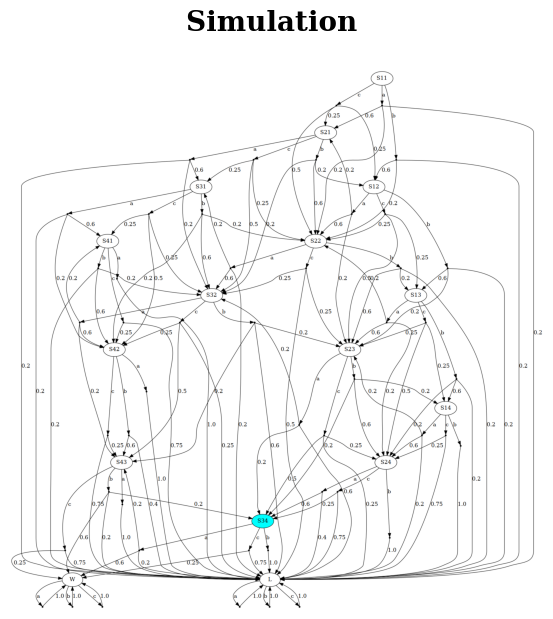

3: Transition from S34 to W using action a


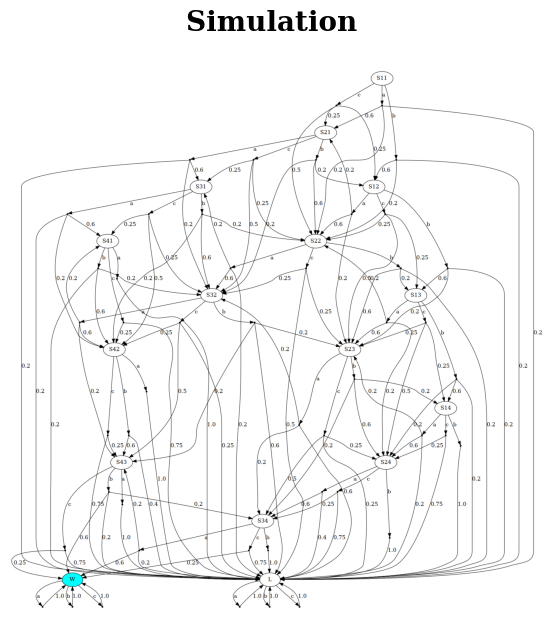

This state loop on himself, ending simulation.


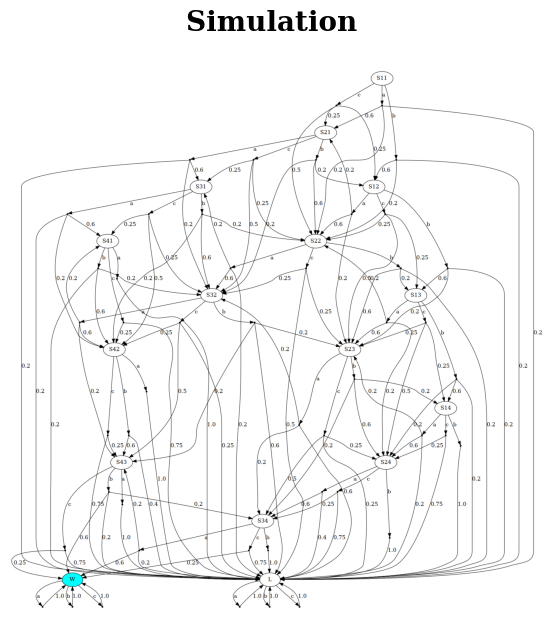

In [3]:
mdp = open("simu-mdp.mdp")
mdp.print()
mdp.simulate(max_steps = 100)

# Model Checking
## Model Checking Probabiliste
### Cha√Ænes de Markov
On √©crit un programme permettant de mesurer les probabilit√©s de respect de la propri√©t√© until, c‚Äôest √† dire calculer P(‚ô¶S) ou P($‚ô¶^{‚â§k}$S).

Pour cela on commence par d√©terminer S1 l‚Äôensemble des √©tats v√©rifiant √† coup s√ªr la propri√©t√©. On prend simplement S1 l‚Äô√©tat ou l‚Äôensemble d‚Äô√©tats S donn√©s par l‚Äôutilisateur.

Pour d√©terminer S0, un ensemble d‚Äô√©tats ne v√©rifiant pas la propri√©t√©, on prend l‚Äôensemble des √©tats n‚Äôappartenant pas √† S1 et bouclant sur eux m√™me.

Les √©tats de S? sont les √©tats restants.

Pour construire A et b, on utilise notre matrice de transition (r√©duite √† la seule ‚Äúaction‚Äù None car nous sommes dans une cha√Æne de Markov).

On commence par retirer l‚Äôensemble des lignes correspondant √† S0 et S1.
b est alors la somme des colonnes correspondant √† S1 et on finit par obtenir A en retirant l‚Äôensemble des colonnes correspondant √† S0 et S1.

Finalement, si k = None (le cas P(‚ô¶S)) on trouve les points fixes de Œì(y)=Ay+b √† l‚Äôaide de la m√©thode solve du module linalg de la biblioth√®que Numpy.

Sinon on calcule Œì(y)(k).


ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['II', 'CI', 'AI', 'CC', 'CA', 'AC', 'AA', 'F', 'B']
Actions defined by the user : ['a']
Transition from II with no action and targets ['CI', 'AI'] with weights [2, 1]
Transition from CI with no action and targets ['CC', 'CA'] with weights [2, 1]
Transition from AI with no action and targets ['AC', 'AA'] with weights [2, 1]
Transition from CC with no action and targets ['F', 'B'] with weights [1, 1]
Transition from CA with no action and targets ['F'] with weights [1]
Transition from AC with no action and targets ['F'] with weights [1]
Transition from AA with no action and targets ['B'] with weights [1]
Transition from F with no action and targets ['F'] with weights [1]
Transition from B with no action and targets ['B'] with weights [1]

--------------
End of parsing

Begin testing
--------------



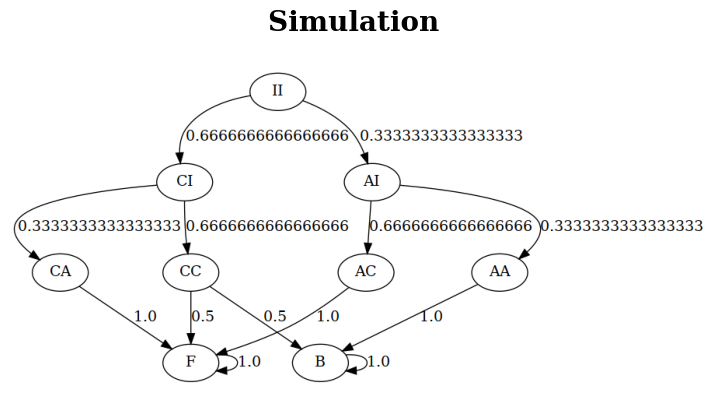

S1 :['F', 'CA', 'AC']
S0 :['B', 'AA']
P(‚ô¶F): [[0.66666667]
 [0.66666667]
 [0.66666667]
 [0.5       ]]
S1 :['F', 'CA', 'AC']
S0 :['B', 'AA']
P(‚ô¶‚â§kF): [[0.66666667]
 [0.66666667]
 [0.66666667]
 [0.5       ]]


In [4]:
mdp = open("fichier2-mc.mdp")
mdp.print()
print(f"P(‚ô¶F): {mdp.modelcheckMC('F')}")
print("P(‚ô¶‚â§10 F): " + f"{mdp.modelcheckMC('F', 10)}")

### Processus de D√©cision Markovien
On va chercher √† trouver Pmax(‚ô¶S ) la probabilit√© de la propri√©t√© until S maximale si on prend le meilleur adversaire pour cela.
S1 est d√©fini de la m√™me fa√ßon que pour la cha√Æne de Markov.

Pour d√©terminer S0, un ensemble d‚Äô√©tats ne v√©rifiant pas la propri√©t√©, on prend l‚Äôensemble des √©tats n‚Äôappartenant pas √† S1 et bouclant sur eux m√™me pour toutes leurs actions.

Pour construire A et b‚Ä¶ 

Pmax(‚ô¶S ) est alors √©gal √† la solution minimale de A.x ‚â• b. On r√©sout cette in√©quation avec la m√©thode linprog du module optimize de la biblioth√®que scipy.

Pmin(‚ô¶S ) est √©gal √† la solution maximale de A.x ‚â§ b. Nous ne somme pas parvenus √† r√©soudre num√©riquement cette in√©quation √† l‚Äôaide des m√©thodes de scipy.



ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

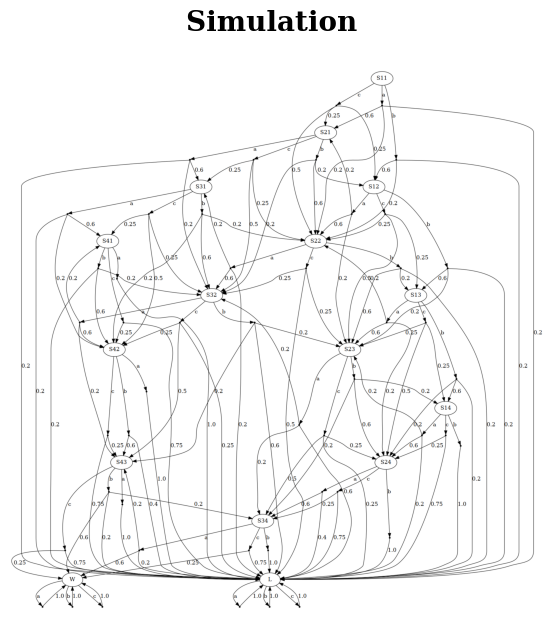

Calcul de pmax(‚ô¶W) : 
[0.42460938 0.46015625 0.4640625  0.36875    0.46015625 0.3890625
 0.49375    0.45       0.4640625  0.49375    0.75       0.36875
 0.45       0.75      ]


In [5]:
mdp = open("simu-mdp.mdp")
mdp.print()
print("Calcul de pmax(‚ô¶W) : \n" + str(mdp.modelcheckMDP("W")[1]))

## Model Checking Statistique
Nous avons impl√©ment√© deux algorithmes de model checking statistique, qui ont chacun leur particularit√©.

Les algorithmes suivants vont faire un certain nombre de simulation, pour rendre cela plus pratique nous avons cr√©√© une nouvelle fonction qui reprend les fonctionnalit√©s de la simulation d√©crite dans la partie Mod√©lisation en enlevant l‚Äôaffichage graphique et la partie qui choisit les actions car on se limite aux cha√Ænes de Markov. 
### Monte-Carlo
Avec l‚Äôalgorithme de Monte-Carlo on va obtenir directement la probabilit√© d‚Äôatteindre un √©tat avec une pr√©cision choisie …õ et un taux d‚Äôerreur Œ¥, on note cette probabilit√© P(‚ô¶S).
On peut aussi choisir de trouver la probabilit√© P(‚ô¶‚â§kS) (Finir dans l‚Äô√©tat S avec maximum k transitions)

Notre impl√©mentation suppose que l‚Äô√©tat S cible est un √©tat ‚Äúfinal‚Äù

L‚Äôid√©e est de faire un nombre N de simulation et de compter le nombre de simulation qui finissent dans l‚Äô√©tat cible (i.e. le nombre de simulation v√©rifiant la propri√©t√© ‚ô¶S ou ‚ô¶‚â§kS), que l‚Äôon divise ensuite par le nombre de simulation effectu√©es.

On calcul la valeur de N gr√¢ce √† la formule de Chernoff-Hoeffding :  
N  ‚â• $ ln(2) - ln(\sigma) \over (2\epsilon)¬≤$  ‚áíP(|$\gamma_N - \gamma$|‚â•Œµ) ‚â§ $\sigma$



ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
Actions defined by the user : ['a']
Transition from S0 with no action and targets ['S1', 'S2'] with weights [1, 1]
Transition from S1 with no action and targets ['S3', 'S4'] with weights [1, 1]
Transition from S2 with no action and targets ['S5', 'S6'] with weights [1, 1]
Transition from S3 with no action and targets ['S1', 'T1'] with weights [1, 1]
Transition from S4 with no action and targets ['T2', 'T3'] with weights [1, 1]
Transition from S5 with no action and targets ['T4', 'T5'] with weights [1, 1]
Transition from S6 with no action and targets ['S2', 'T6'] with weights [1, 1]

--------------
End of parsing

Begin testing
--------------
By default a transition on himself is added.

By default a transition on himsel

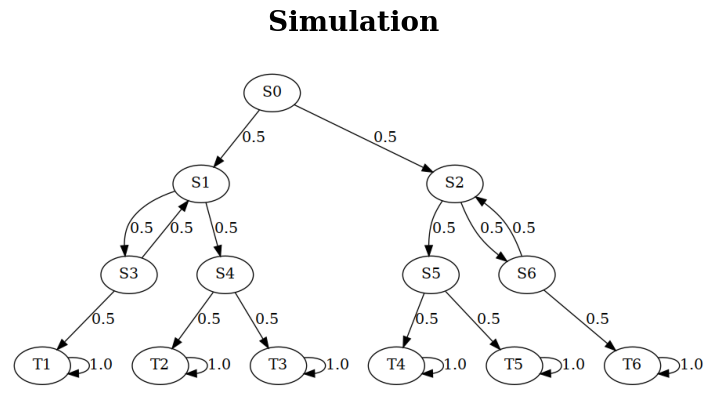

Probabilit√© obtenues avec Monte-Carlo :
[0.1625396346066737, 0.15393326287181036, 0.15627359202778196, 0.16125622829533445, 0.1542352408274196, 0.15695304242790276]


In [6]:
mdp = open("dice.mdp")
mdp.print()
proba = [mdp.MonteCarlo(f"T{i}", 5, 0.01, 0.01) for i in range(1,7)]
print('Probabilit√© obtenues avec Monte-Carlo :\n' + str(proba))

### SPRT (Sequential Probability Ratio Test)
Cet algorithme permet de valider ou d‚Äôinvalider un propri√©t√© de cette forme : P(‚ô¶‚â§kS) ‚â• Œò 
avec Œò une probabilit√© choisie.

On va choisir de plus une pr√©cision Œµ sur cette validation.

On a de plus besoin de ùõÇ et ùú∑ qui vont nous servir respectivement d‚Äôerreur sur la validation et l‚Äôinvalidation.

L‚Äôid√©e de l‚Äôalgorithme SPRT est de comparer deux hypoth√®se H0 et H1 d√©finit de la sorte :

H0 : Œ≥ ‚â• Œ≥0

H1 : Œ≥ Ôºú Œ≥1

On d√©finit donc Œ≥0 = Œ≥ + Œµ et Œ≥1 = Œ≥ - Œµ

On d√©finit de plus Rm une valeur repr√©sentative du nombre de simulation ‚Äúaccept√©s‚Äù compar√© au nombre de simulation totale m.

A chaque nouvelle simulation on actualise la valeur de Rm et on la compare √† des valeurs A et B :
Si Rm ‚â• A on accepte l‚Äôhypoth√®se H1
Si Rm ‚â§ B on accepte l‚Äôhypoth√®se H0
Nous avons choisi A = $1 - \beta \over ùõÇ$  et B = $\beta \over 1 - \alpha$

In [7]:
Hyps = [f"T{i}: {mdp.SPRT(f'T{i}', 5, 0.01, 0.01, 0.16, 0.01, 30_000)}" for i in range(1,7)]
for hyp in Hyps :
    print(hyp)

T1: On valide l'hypoth√®se P(‚ô¶T1) <= 0.16 - 0.01
T2: On valide l'hypoth√®se P(‚ô¶T2) <= 0.16 - 0.01
T3: On valide l'hypoth√®se P(‚ô¶T3) <= 0.16 - 0.01
T4: On valide l'hypoth√®se P(‚ô¶T4) <= 0.16 - 0.01
T5: On valide l'hypoth√®se P(‚ô¶T5) <= 0.16 - 0.01
T6: On valide l'hypoth√®se P(‚ô¶T6) <= 0.16 - 0.01


### Model Checking Statistique pour les Processus de D√©cision Markoovien
Nous avons impl√©ment√© les algorithme propos√©s dans D. Henriques, J. G. Martins, P. Zuliani, A. Platzer and E. M. Clarke, "Statistical Model Checking for Markov Decision Processes," 2012 Ninth International Conference on Quantitative Evaluation of Systems, London, UK, 2012, pp. 84-93, doi: 10.1109/QEST.2012.19.

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

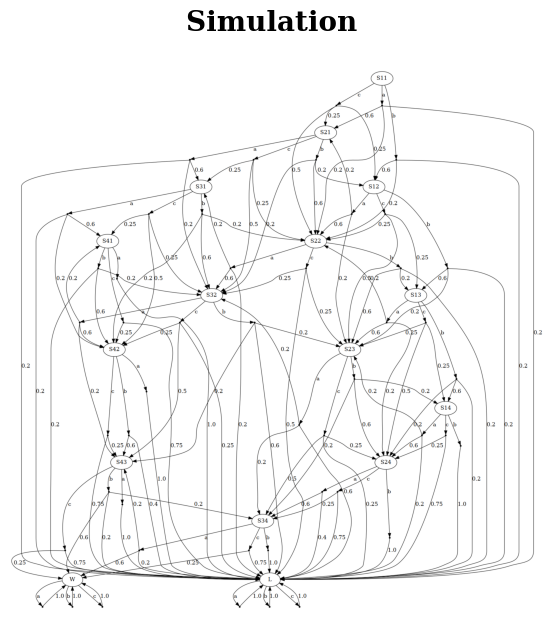

 45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                        | 9/20 [01:20<01:38,  8.97s/it]

0.41


In [8]:
mdp = open("simu-mdp.mdp")
mdp.print()
for i in tqdm(range(50, 30, -1)):
    theta = i/100
    if not mdp.SMC4MDP('W', h=0.5, eps=0.01, N=2000, L=30, p=0.5, eta=0.1, SPRT_max_step=100, SPRT_alpha=0.01, SPRT_beta=0.01, SPRT_eps=0.01, SPRT_N=300_000, SPRT_theta=theta):
        print(theta)
        break


# R√©compenses et Apprentissage par Renforcement
Pour cette partie, on lie aux √©tats de nos Processus de D√©cisions Markoviens et Cha√Ænes de Markov une notion de r√©compense num√©rique. L‚Äôobjectif de l‚Äôapprentissage par renforcement est de trouver l‚Äôadversaire maximisant les r√©compenses r√©colt√©es.

## R√©compenses : It√©ration de valeurs

Afin de calculer les r√©compenses obtenables depuis chaque √©tat on utilise l‚Äôalgorithme d‚Äôit√©ration de valeurs.

Pour cet algorithme, on a besoin de :

- ùõÑ : le facteur de pond√©ration, on a vu qu‚Äôil faut ùõÑÔºú1.
- ùõÜ : la pr√©cision sur les r√©compense collect√©es.

Nous avons impl√©ment√© l'algorithme pr√©sent√© en cours. Il est applicable √† la fois aux cha√Ænes de Markov et aux processus de d√©cisions markoviens.

Dans le cas des processus de d√©cisions markoviens cet algorithme donne l'adversaire qui maximise les r√©compenses r√©colt√©es.


ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4'], cost defined by the user [0, 5, 100, 500, 3]
Actions defined by the user : ['a', 'b', 'c']
Transition from S0 with action a and targets ['S1', 'S2'] with weights [1, 1]
Transition from S0 with action b and targets ['S3', 'S4'] with weights [1, 9]
Transition from S1 with action c and targets ['S0'] with weights [1]
Transition from S2 with action c and targets ['S0'] with weights [1]
Transition from S3 with action c and targets ['S0'] with weights [1]
Transition from S4 with action c and targets ['S0'] with weights [1]

--------------
End of parsing

Begin testing
--------------
Il n'y a pas de probl√®mes
--------------
End testing

Markovian Decision Process Summary
----------------------------------
States : ['S0', 'S1', 'S2', 'S3', 'S4']
Actions : ['a', 'b', 'c']
T

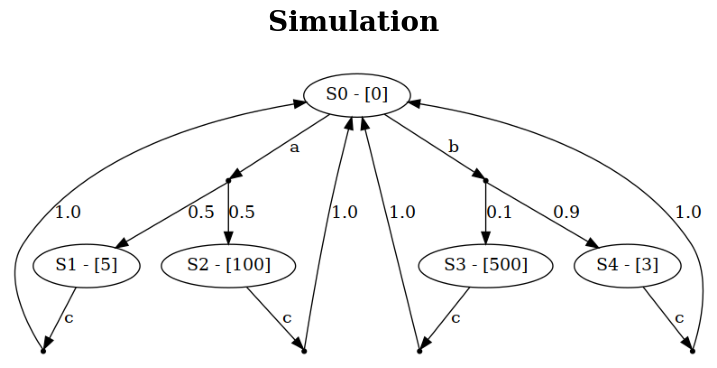

Les r√©compenses sont : [ 34.99609375  22.2921875  117.2921875  517.2921875   20.2921875 ]
L'adversaire correspondant est : ['b', 'c', 'c', 'c', 'c']


In [9]:
mdp = open("ex3.mdp")
mdp.print()
reward, opponent = mdp.iter_values(0.5, 1)
print("Les r√©compenses sont : " + str(reward))
print("L'adversaire correspondant est : " + str(opponent))

## Apprentissage par renforcement : Q-learning

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4'], cost defined by the user [0, 5, 100, 500, 3]
Actions defined by the user : ['a', 'b', 'c']
Transition from S0 with action a and targets ['S1', 'S2'] with weights [1, 1]
Transition from S0 with action b and targets ['S3', 'S4'] with weights [1, 9]
Transition from S1 with action c and targets ['S0'] with weights [1]
Transition from S2 with action c and targets ['S0'] with weights [1]
Transition from S3 with action c and targets ['S0'] with weights [1]
Transition from S4 with action c and targets ['S0'] with weights [1]

--------------
End of parsing

Begin testing
--------------
Il n'y a pas de probl√®mes
--------------
End testing

Markovian Decision Process Summary
----------------------------------
States : ['S0', 'S1', 'S2', 'S3', 'S4']
Actions : ['a', 'b', 'c']
T

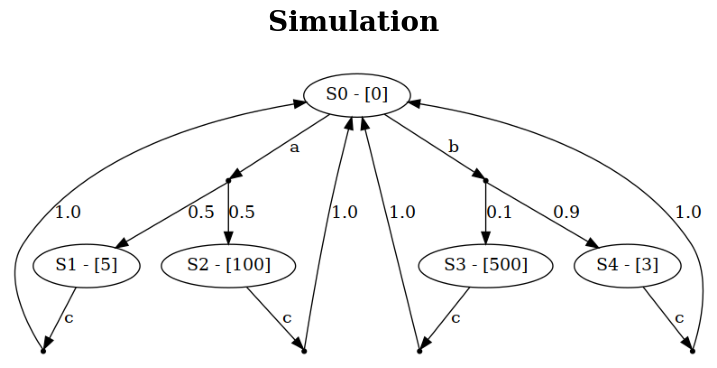

array([[ 34.84494678,  35.3631485 ,   0.        ],
       [  0.        ,   0.        ,  22.3719031 ],
       [  0.        ,   0.        , 117.37025378],
       [  0.        ,   0.        , 517.18713388],
       [  0.        ,   0.        ,  20.38253695]])

In [10]:
mdp = open("ex3.mdp")
mdp.print()
mdp.Q_Learning(100_000, 0.5)